# Sheet 5

In [2]:
import numpy as np
from matplotlib import pyplot as plt

## 1 QDA
### (a)

In [3]:
pts = np.load('data/data1d.npy')
labels = np.load('data/labels1d.npy')

In [4]:
# Check label options
print(f"Unique labels:{np.unique(labels)}\n Number of unique labels:{len(np.unique(labels))}")
# Split the data by the labels
data = {}
for label in np.unique(labels):
    data[label] = pts[labels == label]

Unique labels:[0. 1.]
 Number of unique labels:2


In [5]:
# Obtain mean and std for each label
mean = {}
std = {}
for label in data.keys():
    mean[label] = np.mean(data[label])
    std[label] = np.std(data[label])
print(f"Mean:{mean}\nStd:{std}")

Mean:{0.0: 0.10577655907233517, 1.0: 2.105667088262294}
Std:{0.0: 1.0185184414859962, 1.0: 1.4196573388063498}


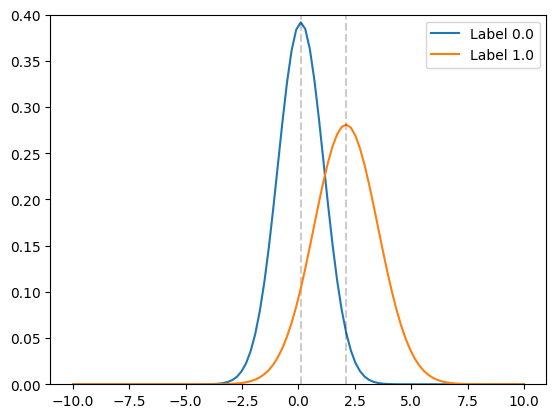

In [6]:
#Plot gaussian distributions based on the mean and std
# Add dashed lines for the means
x = np.linspace(-10, 10, 100)
for label in data.keys():
    y = 1/(std[label]*np.sqrt(2*np.pi))*np.exp(-0.5*(x-mean[label])**2/std[label]**2)
    plt.plot(x, y, label=f"Label {label}")
    plt.axvline(mean[label], color='k', linestyle='--', alpha = 0.2,)
plt.ylim(0, 0.4)
plt.legend()
plt.show()

### (b)

In [7]:
data = pts

# Separate data by class
data_class_0 = data[labels == 0]
data_class_1 = data[labels == 1]

# Compute mean and standard deviation for each class
mean_0, std_0 = np.mean(data_class_0), np.std(data_class_0)
mean_1, std_1 = np.mean(data_class_1), np.std(data_class_1)

print(f"Class 0: Mean = {mean_0}, Std Dev = {std_0}")
print(f"Class 1: Mean = {mean_1}, Std Dev = {std_1}")


Class 0: Mean = 0.10577655907233517, Std Dev = 1.0185184414859962
Class 1: Mean = 2.105667088262294, Std Dev = 1.4196573388063498


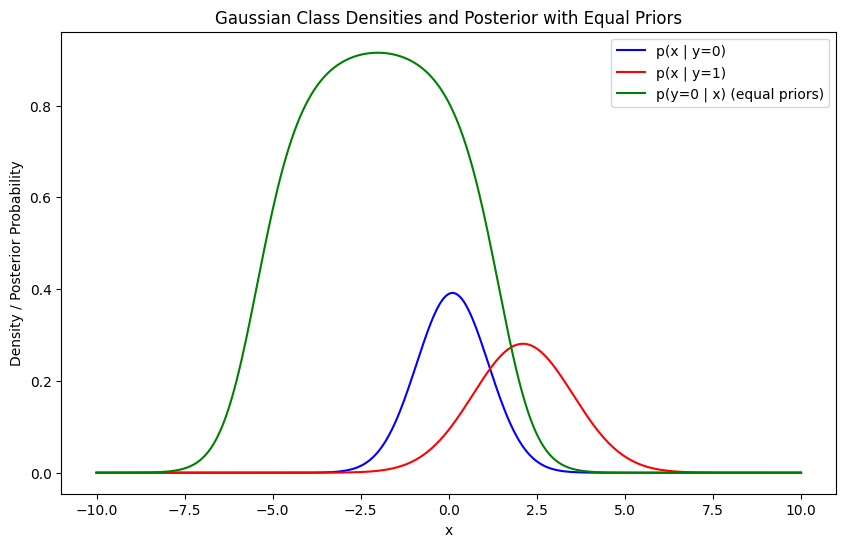

In [8]:
from scipy.stats import norm

# Define the range for plotting
x_values = np.linspace(-10, 10, 500)

# Calculate Gaussian class densities
density_0 = norm.pdf(x_values, mean_0, std_0)
density_1 = norm.pdf(x_values, mean_1, std_1)

# Define prior probabilities
p_y_0 = 0.5  # Initially equal priors
p_y_1 = 0.5

# Compute posterior for p(y=0|x) with equal priors
posterior_y0_equal_prior = (density_0 * p_y_0) / (density_0 * p_y_0 + density_1 * p_y_1)
posterior_y1_equal_prior = (density_1 * p_y_1) / (density_0 * p_y_0 + density_1 * p_y_1)

# Plot the class densities and posterior with equal priors
plt.figure(figsize=(10, 6))
plt.plot(x_values, density_0, label="p(x | y=0)", color="blue")
plt.plot(x_values, density_1, label="p(x | y=1)", color="red")
plt.plot(x_values, posterior_y0_equal_prior, label="p(y=0 | x) (equal priors)", color="green")
plt.title("Gaussian Class Densities and Posterior with Equal Priors")
plt.xlabel("x")
plt.ylabel("Density / Posterior Probability")
plt.legend()
plt.show()


See something reasonable around the regions of the means, with the 0 class initially dominating, and then the 1 class taking over as we move to larger x.
There are issue at the tails however:
- Below -5 the posterior significantly drops off again, suggesting class 1 dominance, which is not the case.
- Class 1 also dominates for large x 

Clearly we have some issue with modelling outside the ranges of the standard deviations.

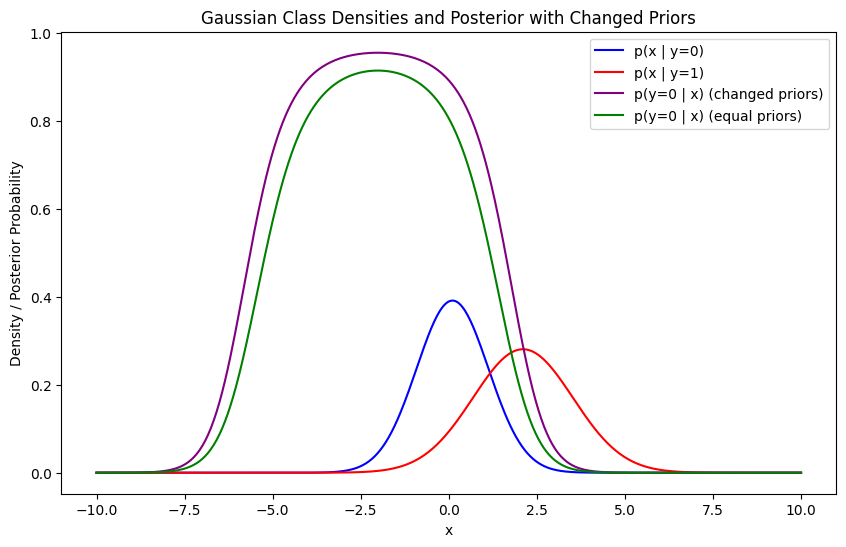

In [9]:
# Change the prior probabilities
p_y_0 = 2 / 3  # Now p(y=0) = 2 * p(y=1)
p_y_1 = 1 / 3

# Compute posterior for p(y=0|x) with changed priors
posterior_y0_changed_prior = (density_0 * p_y_0) / (density_0 * p_y_0 + density_1 * p_y_1)
posterior_y1_changed_prior = (density_1 * p_y_1) / (density_0 * p_y_0 + density_1 * p_y_1)

# Plot the class densities and posterior with changed priors
plt.figure(figsize=(10, 6))
plt.plot(x_values, density_0, label="p(x | y=0)", color="blue")
plt.plot(x_values, density_1, label="p(x | y=1)", color="red")
plt.plot(x_values, posterior_y0_changed_prior, label="p(y=0 | x) (changed priors)", color="purple")
plt.plot(x_values, posterior_y0_equal_prior, label="p(y=0 | x) (equal priors)", color="green")
#plt.plot(x_values, posterior_y1_changed_prior, label="p(y=0 | x) (equal priors)", color="green", linestyle="--")
plt.title("Gaussian Class Densities and Posterior with Changed Priors")
plt.xlabel("x")
plt.ylabel("Density / Posterior Probability")
plt.legend()
plt.show()

Posterior gets broader and taller - signifying increased dominance of 0 class over 1 class. Same issues beyond reasonable ranges of standard deviations.

## 3 Trees and Random Forests

### (b) 

In [10]:
# load the data
pts = np.load('data/data1d.npy')
labels = np.load('data/labels1d.npy')

# TODO: Sort the points to easily split them

# TODO: Implement or find implementation for Gini impurity, entropy and misclassifcation rate

def probabilities(partition):
    # divide counts by size of dataset to get cluster probabilites
    return np.unique(partition, return_counts=True)[1] / len(partition)

def compute_split_measure(l, l0, l1, method):
    p0 = probabilities(l0)
    p1 = probabilities(l1)
    p = probabilities(l)
    return method(p) - (len(l0) * method(p0) + len(l1) * method(p1)) / (len(l))

# TODO: Iterate over the possible splits, evaulating and saving the three criteria for each one
# TODO: Then, Compute the split that each criterion favours and visualize them 
#       (e.g. with a histogram for each class and vertical lines to show the splits)

### (b)

In [41]:
# load the dijet data
features = np.load('data/dijet_features_normalized.npy')
labels = np.load('data/dijet_labels.npy')

# TODO: define train, val and test splits as specified (make sure to shuffle the data before splitting it!)

In [8]:
from sklearn.ensemble import RandomForestClassifier

# TODO: train a random forest classifier for each combination of specified hyperparameters 
#       and evaluate the performances on the validation set.

In [9]:
# TODO: for your preferred configuration, evaluate the performance of the best configuration on the test set